In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
flights = sns.load_dataset('flights')

In [5]:
iris = sns.load_dataset('iris')

# 1. Scatterplot(Numerical-Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

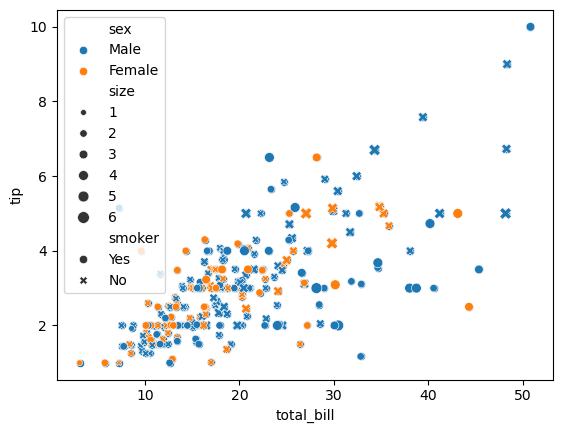

In [7]:
#relationship btw total_bill and tip
sns.scatterplot(x=tips['total_bill'],y=tips['tip'])
#now specify hue to find sex which becomes multivariate analysis
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])

# 2. Barplot(Numerical - Categorical)

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='pclass', ylabel='age'>

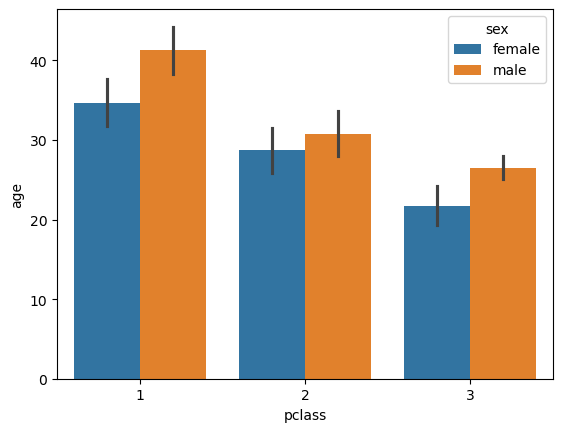

In [10]:
sns.barplot(x=titanic['pclass'],y=titanic['age'],hue=titanic['sex'])

# 3.Boxplot(Numerical-Categorical)

<Axes: xlabel='sex', ylabel='age'>

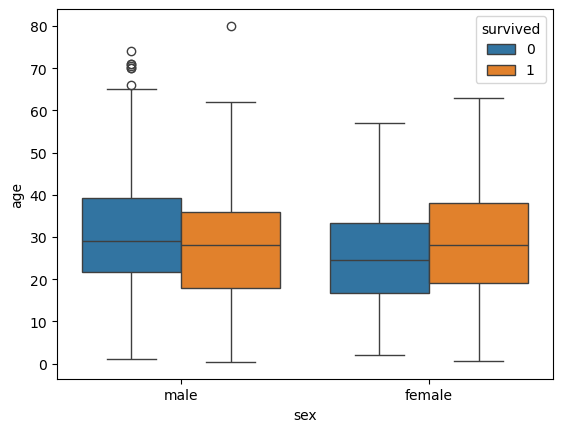

In [12]:
sns.boxplot(x=titanic['sex'],y=titanic['age'],hue=titanic['survived'])

# 4. Distplot(Numerical-Categorical)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\3450530475.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['survived']==0]['age'],hist=False)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\3450530475.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t

<Axes: xlabel='age', ylabel='Density'>

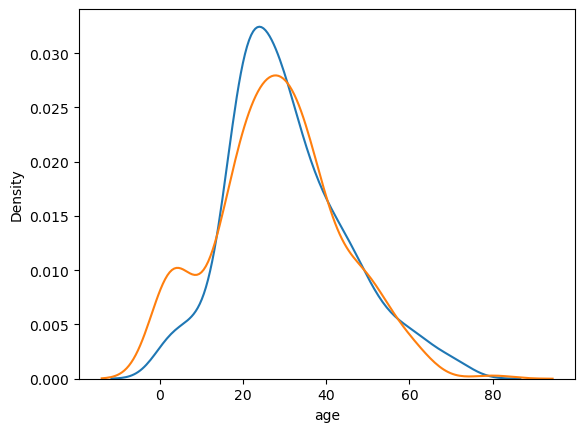

In [14]:
sns.distplot(titanic[titanic['survived']==0]['age'],hist=False)
sns.distplot(titanic[titanic['survived']==1]['age'],hist=False)

# 5.Heatmap(categorical-categorical)

In [16]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='pclass'>

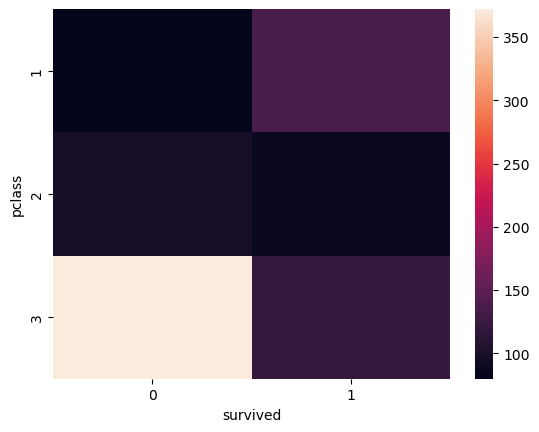

In [17]:
sns.heatmap(pd.crosstab(titanic['pclass'],titanic['survived']))

<Axes: xlabel='pclass'>

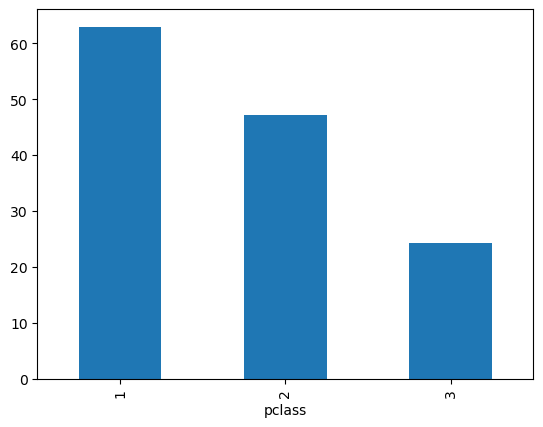

In [24]:
(titanic.groupby('pclass')['survived'].mean() * 100).plot(kind='bar')

In [32]:
titanic.groupby('pclass')['survived'].mean()*100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

In [36]:
titanic.groupby('embarked')['survived'].mean()*100

embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64

# 6.Clustermap (Categorical-Categorical)

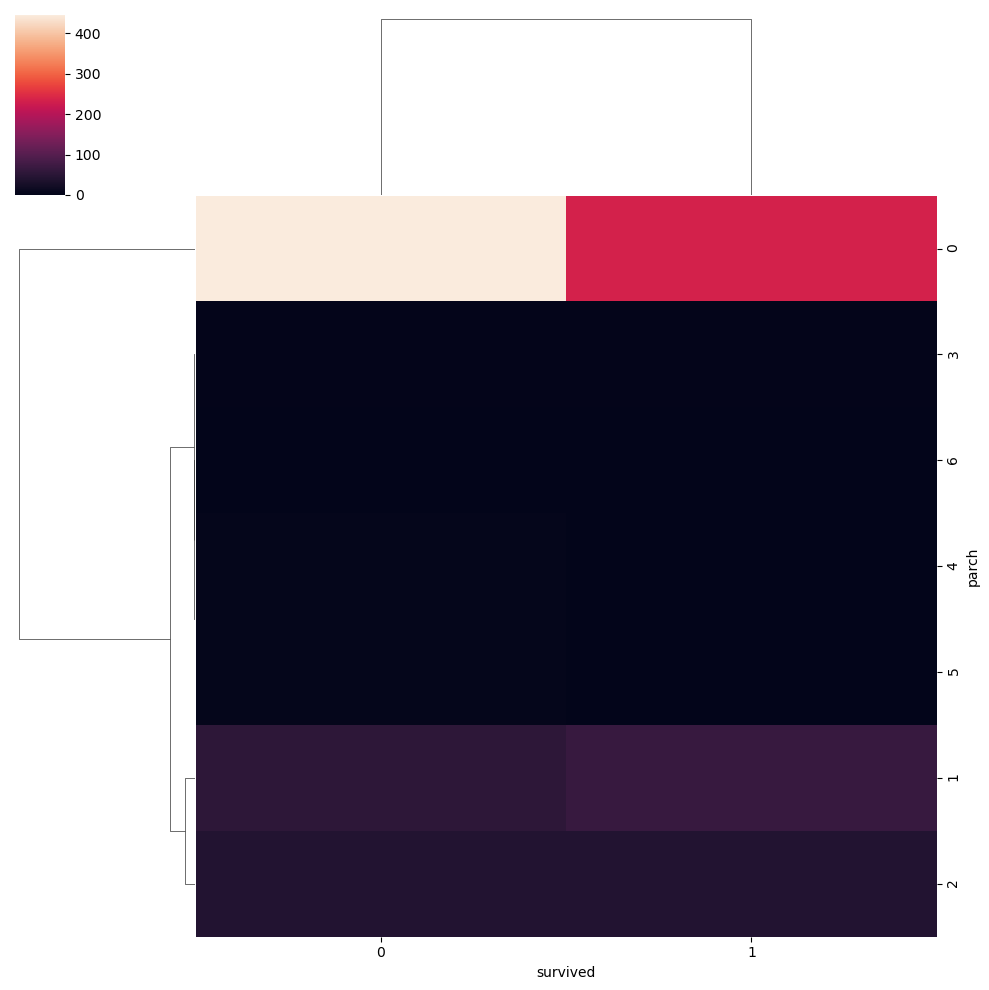

In [43]:
sns.clustermap(pd.crosstab(titanic['parch'],titanic['survived']))

# 7.Pairplot

In [46]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


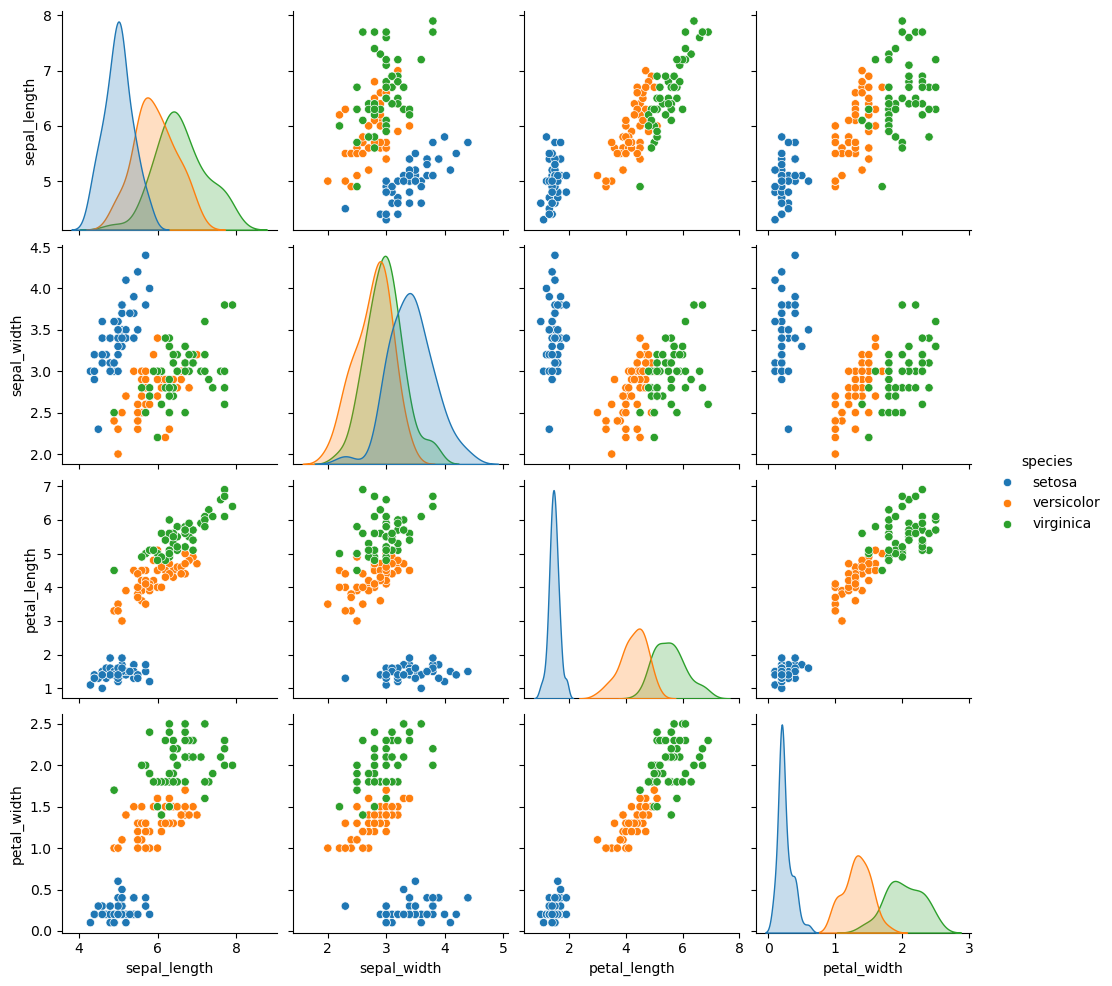

In [50]:
sns.pairplot(iris,hue='species')

# 8.Lineplot(Numerical-Numerical)

In [70]:
#for time data
flights.head()
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [76]:
newdf = flights.groupby('year').sum(numeric_only=True).reset_index()

<Axes: xlabel='year', ylabel='passengers'>

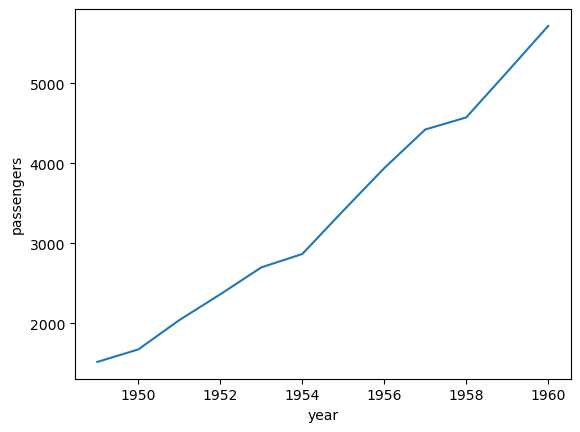

In [82]:
sns.lineplot(x= newdf['year'],y=newdf['passengers'])

In [86]:
flights.pivot_table(values='passengers',index='month',columns='year')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\2056291100.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

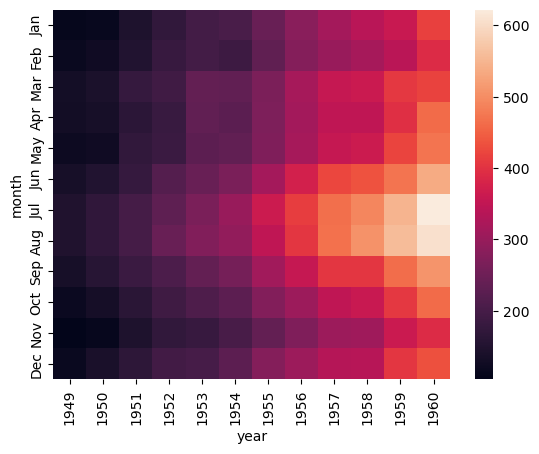

In [88]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\1868718285.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))


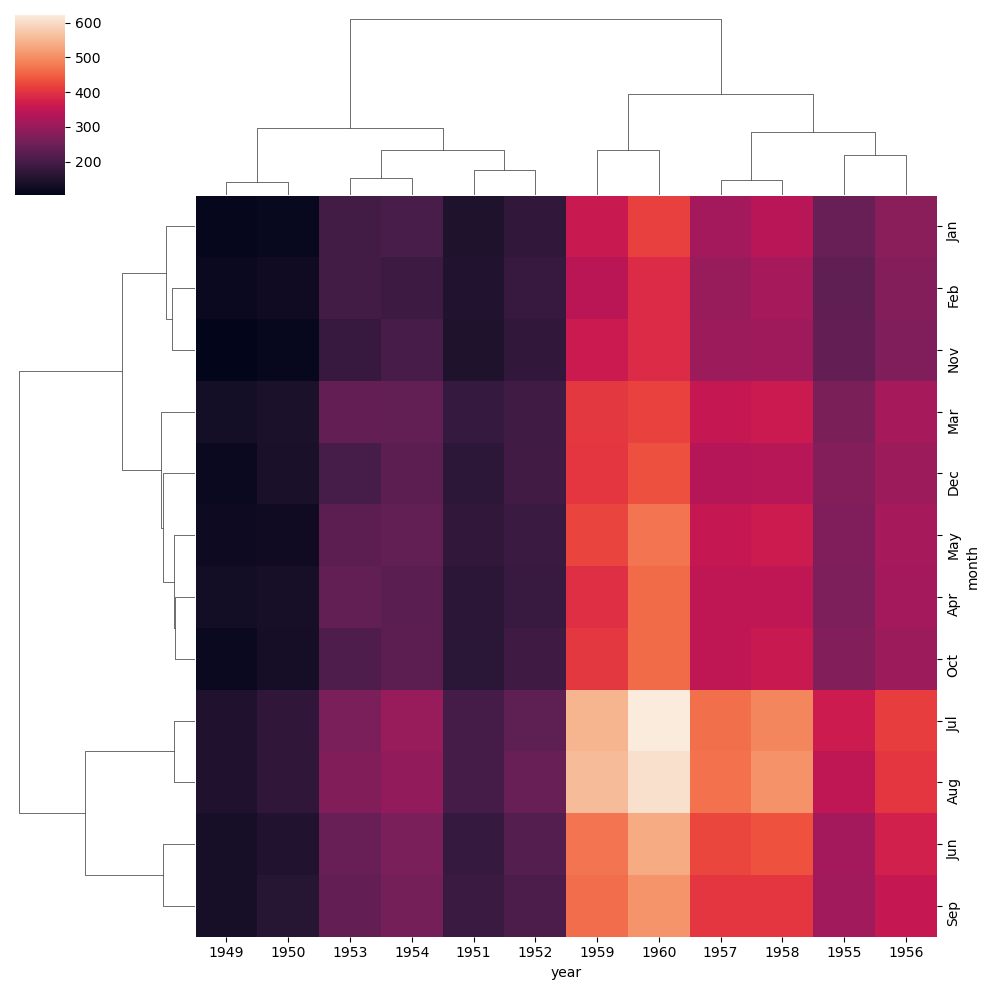

In [90]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))